In [1]:
import numpy as np
import pandas as pd
import spacy
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
import seaborn as sns
import time
import matplotlib.pyplot as plt

from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

print("Imports Done")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bvadu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bvadu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Imports Done


In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
start = time.time()
chunk = pd.read_csv('data/questionposts.csv', chunksize=10000, on_bad_lines='skip')
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")
question_df = pd.concat(chunk)

question_df.head()

Read csv with chunks:  0.008138895034790039 sec


,Id,StateAbbr,QuestionUno,PostText,CreatedUtc
0,1,AK,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,Do you still need help with this issue? It ha...,2018-04-25 18:09:30
1,2,AK,C579CE49-6B7A-44E7-A203-5D3E52623804,Anyone?,2018-04-17 21:15:28
2,3,AK,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,"Yes, those are the right forms. I'm sorry, I ...",2018-04-18 17:51:41
3,4,AK,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,"Hi ###,You do make some good points. The diff...",2018-04-18 22:15:44
4,5,AK,B4C814C9-8983-413F-8BC4-F2BE01665555,My father passed away and I have DNA test resu...,2018-04-12 10:52:50


In [ ]:
posttext = question_df["PostText"]
text_tokens = []
ner_tagged_text = []

#st = StanfordNERTagger('/usr/share/stanford-ner/classifiers/english.all.3class.distsim.crf.ser.gz', '/usr/share/stanford-ner/stanford-ner.jar', encoding='utf-8')

for item in posttext:
    try:
        tokenized_text = word_tokenize(item)
        text_tokens.append(tokenized_text)
    except:
        pass
    #tagged_text = st.tag(tokenized_text)
    #ner_tagged_text.append(tagged_text)
    

print(text_tokens[:10])
#print(ner_tagged_text[:10])
    

In [ ]:
posttext = question_df["PostText"]
sentiment_scores = []
i = 0
for item in posttext:
    item = str(item)
    ss = sid.polarity_scores(item)
    sentiment_scores.append(ss)
    i += 1
    if (i % 1000 == 0):
        print(i)
print(sentiment[:10])

In [ ]:
print(sentiment_scores[:10])

In [ ]:
compound_scores = []
for summary in sentiment_scores:
    compound_scores.append(summary['compound'])

In [ ]:
sns.histplot(compound_scores)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment of Questions")
plt.savefig("figures/QuestionSentiments.png")
plt.show()

In [5]:
posttext = question_df["PostText"]
processed_text = []
i = 0
for item in posttext:
    processed_text.append(word_tokenize(str(item)))
    i += 1
    
    if (i % 10000 == 0):
        print(i)
    

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000


In [8]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from string import punctuation

punctuation = list(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bvadu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
cleaned_text = []
for sent in processed_text:
    new_sent = []
    for word in sent:
        if word not in stopwords and word not in punctuation:
            new_sent.append(word)
    
    cleaned_text.append(new_sent)

print(cleaned_text[:10])

[['Do', 'still', 'need', 'help', 'issue', 'It', 'little', 'since', 'posted'], ['Anyone'], ['Yes', 'right', 'forms', 'I', "'m", 'sorry', 'I', "n't", 'get', 'notification', 'question', 'today', 'I', "'m", 'going', 'check', 'system'], ['Hi', 'You', 'make', 'good', 'points', 'The', 'difference', 'stocks', 'bonds', 'banks', 'regulated', 'Federal', 'government', 'Securities', 'Exchange', 'Commission', 'They', 'follow', 'stringent', 'Federal', 'regulations', 'If', 'wanted', 'make', 'arguments', 'judge', 'would', 'But', 'I', 'would', 'advise', "'s", 'better', 'position', 'If', 'avoid', 'changing', 'say', 'would', "n't", 'No', 'one', 'holding', 'gun', 'head', 'making', 'play', 'game', 'spend', 'money', 'say', 'remarks', 'You', 'always', 'opt', 'find', 'different', 'forum', 'express', 'Or', 'could', 'decide', 'invest', 'money', 'game', 'think', "'s", 'risky', 'investment'], ['My', 'father', 'passed', 'away', 'I', 'DNA', 'test', 'results', 'one', 'sisters', 'I', 'would', 'like', 'inherit', 'nativ

In [14]:
from nltk.stem import PorterStemmer, SnowballStemmer

from nltk import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

ps = PorterStemmer()

ss = SnowballStemmer('english')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bvadu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bvadu\AppData\Roaming\nltk_data...


In [15]:
sl_sentences = []

for sent in cleaned_text:
    temp_sent = []
    for word in sent:
        temp_word = ps.stem(word)
        temp_word = lemmatizer.lemmatize(temp_word)
        temp_sent.append(temp_word)
    sl_sentences.append(temp_sent)

print(sl_sentences[:10])

[['do', 'still', 'need', 'help', 'issu', 'it', 'littl', 'sinc', 'post'], ['anyon'], ['ye', 'right', 'form', 'i', "'m", 'sorri', 'i', "n't", 'get', 'notif', 'question', 'today', 'i', "'m", 'go', 'check', 'system'], ['hi', 'you', 'make', 'good', 'point', 'the', 'differ', 'stock', 'bond', 'bank', 'regul', 'feder', 'govern', 'secur', 'exchang', 'commiss', 'they', 'follow', 'stringent', 'feder', 'regul', 'if', 'want', 'make', 'argument', 'judg', 'would', 'but', 'i', 'would', 'advis', "'s", 'better', 'posit', 'if', 'avoid', 'chang', 'say', 'would', "n't", 'no', 'one', 'hold', 'gun', 'head', 'make', 'play', 'game', 'spend', 'money', 'say', 'remark', 'you', 'alway', 'opt', 'find', 'differ', 'forum', 'express', 'or', 'could', 'decid', 'invest', 'money', 'game', 'think', "'s", 'riski', 'invest'], ['my', 'father', 'pas', 'away', 'i', 'dna', 'test', 'result', 'one', 'sister', 'i', 'would', 'like', 'inherit', 'nativ', 'dividend', 'birth', 'certif', 'way', 'get', 'proof', 'biolog', 'father', 'i', 'g

In [17]:
word_freq = {}
for sent in sl_sentences:
    for word in sent:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

print(list(word_freq.keys())[:10])

['do', 'still', 'need', 'help', 'issu', 'it', 'littl', 'sinc', 'post', 'anyon']


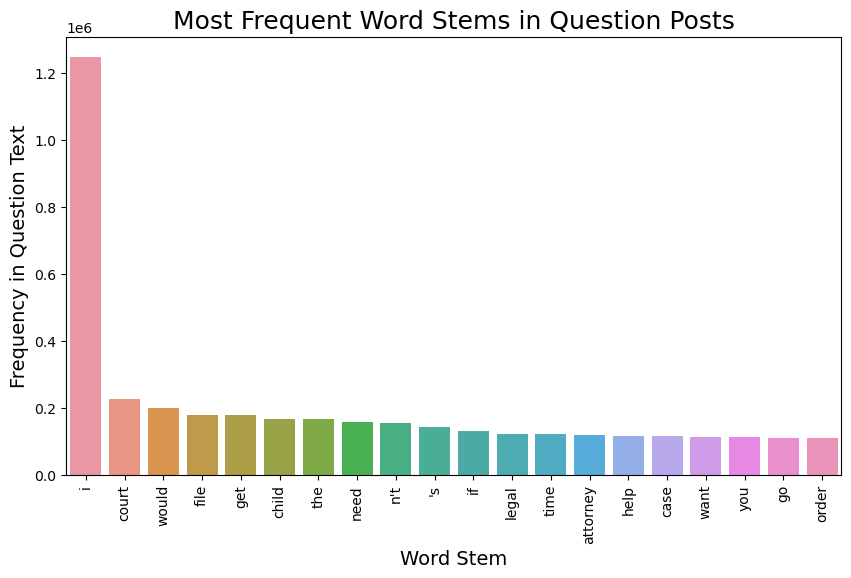

In [23]:
sorted_words = dict(sorted(word_freq.items(), key = lambda x : x[1], reverse = True))
most_common_words = list(sorted_words.keys())[:20]
most_common_words_freq = [sorted_words[temp] for temp in most_common_words]

plt.figure(figsize = (10,6))
sns.barplot(x = most_common_words, y = most_common_words_freq)
plt.xticks(rotation=90, size = 10)
plt.xlabel("Word Stem", size = 14)
plt.ylabel("Frequency in Question Text", size = 14)
plt.title("Most Frequent Word Stems in Question Posts", size = 18)
plt.subplots_adjust(bottom=0.15)
plt.savefig('figures/mostcommonwords.png')
plt.show()